Importing all the libraries

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix ## for sparse matrix
from sklearn.neighbors import NearestNeighbors #knn
from fuzzywuzzy import process #for String  matching
import re #regular expression


In [ ]:
movies='movies.csv'
ratings='ratings.csv'
Movies=pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})#defining movies matrix
Ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})#defining ratings matrix 

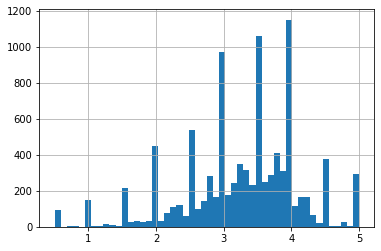

In [ ]:
##plotting mean rates
avg_ratings=pd.DataFrame(Ratings.groupby('movieId')['rating'].mean())
avg_ratings.columns=['avg_rating']
avg_ratings['avg_rating'].hist(bins=50)

In [ ]:
#Now Movies matrix contains Movie Id and Title
#Ratings contain UserId, ID of the movie he rated and rating of the user
#now our goal is to combine them into single matrix the resultantent should look in this way
'''         Users rating----->
    MovieID   USER 1  USER2 ......
      1        5       4  
      2        1        1
      3        4       3
      4         2        1       '''



In [ ]:
movies_users_ratings=Ratings.pivot(index='movieId', columns='userId',values='rating')##combining them into single matrix
movies_users_ratings=movies_users_ratings.fillna(0)#filling unrated movies with "0"


In [ ]:
movies_users_ratings

In [ ]:
def standardize(col):
  new_col=(col-col.mean())/(col.max()-col.min());
  return new_col
movies_users_ratings_sdr=movies_users_ratings.apply(standardize)

In [ ]:
movies_users_ratings_sdr

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.779165,-0.002355,-0.001954,-0.015796,0.796709,-0.022563,0.889901,-0.003455,-0.003085,-0.009441,-0.004977,-0.00289,-0.002324,-0.003353,0.490426,-0.007507,0.890909,0.661466,0.762299,-0.017873,0.67029,-0.006294,-0.009081,-0.009175,-0.002571,-0.001748,0.590148,-0.035407,-0.0069,-0.003311,0.995969,0.592123,0.587844,-0.006047,-0.001933,-0.003611,-0.001789,-0.005162,-0.008227,0.99202,...,-0.005923,0.786857,0.974095,-0.001872,-0.002345,-0.001275,-0.011806,-0.002201,0.794035,0.568346,-0.003599,-0.004638,-0.003795,0.992986,-0.00544,-0.018675,0.986508,-0.003743,-0.003311,0.749753,-0.00364,-0.006931,-0.006921,-0.018727,-0.001728,0.770455,0.76376,-0.001645,0.465343,0.453054,0.790806,-0.00942,0.731962,0.592842,0.785407,0.416125,0.785438,0.446431,0.746889,0.901224
2,-0.020835,-0.002355,-0.001954,-0.015796,-0.003291,0.777437,-0.010099,0.796545,-0.003085,-0.009441,-0.004977,-0.00289,-0.002324,-0.003353,-0.009574,-0.007507,-0.009091,0.561466,0.562299,0.582127,0.67029,-0.006294,-0.009081,-0.009175,-0.002571,-0.001748,0.790148,-0.035407,-0.0069,-0.003311,-0.004031,-0.007877,-0.012155,-0.006047,-0.001933,-0.003611,-0.001789,-0.005162,-0.008227,-0.00798,...,-0.005923,-0.013143,0.874095,-0.001872,-0.002345,-0.001275,-0.011806,-0.002201,-0.005965,-0.031654,-0.003599,-0.004638,-0.003795,-0.007014,-0.00544,0.781325,-0.013492,-0.003743,-0.003311,0.449753,-0.00364,0.793069,-0.006921,0.781273,-0.001728,-0.029545,-0.03624,-0.001645,0.365343,0.753054,-0.009194,0.79058,-0.068038,0.992842,0.685407,-0.083875,-0.014562,0.346432,-0.003111,-0.098776
3,0.779165,-0.002355,-0.001954,-0.015796,-0.003291,0.977437,-0.010099,-0.003455,-0.003085,-0.009441,-0.004977,-0.00289,-0.002324,-0.003353,-0.009574,-0.007507,-0.009091,-0.038534,0.562299,-0.017873,-0.02971,-0.006294,-0.009081,-0.009175,-0.002571,-0.001748,-0.009852,-0.035407,-0.0069,-0.003311,-0.004031,0.592123,-0.012155,-0.006047,-0.001933,-0.003611,-0.001789,-0.005162,-0.008227,-0.00798,...,-0.005923,-0.013143,-0.025905,-0.001872,-0.002345,-0.001275,-0.011806,-0.002201,-0.005965,-0.031654,-0.003599,-0.004638,-0.003795,-0.007014,-0.00544,-0.018675,-0.013492,0.596257,-0.003311,0.549753,-0.00364,-0.006931,-0.006921,0.781273,-0.001728,-0.029545,-0.03624,-0.001645,0.165343,-0.046946,-0.009194,-0.00942,-0.068038,-0.007158,-0.014593,-0.083875,-0.014562,0.346432,-0.003111,-0.098776
4,-0.020835,-0.002355,-0.001954,-0.015796,-0.003291,0.577437,-0.010099,-0.003455,-0.003085,-0.009441,-0.004977,-0.00289,-0.002324,0.596647,-0.009574,-0.007507,-0.009091,-0.038534,-0.037701,-0.017873,-0.02971,-0.006294,-0.009081,-0.009175,-0.002571,-0.001748,-0.009852,-0.035407,-0.0069,-0.003311,-0.004031,-0.007877,-0.012155,-0.006047,-0.001933,-0.003611,-0.001789,-0.005162,-0.008227,-0.00798,...,-0.005923,-0.013143,-0.025905,-0.001872,-0.002345,-0.001275,-0.011806,-0.002201,-0.005965,-0.031654,-0.003599,-0.004638,-0.003795,-0.007014,-0.00544,-0.018675,-0.013492,-0.003743,-0.003311,-0.050247,-0.00364,-0.006931,-0.006921,-0.018727,-0.001728,-0.029545,-0.03624,-0.001645,-0.134657,0.253054,-0.009194,-0.00942,-0.068038,-0.007158,-0.014593,-0.083875,-0.014562,-0.053568,-0.003111,-0.098776
5,-0.020835,-0.002355,-0.001954,-0.015796,-0.003291,0.977437,-0.010099,-0.003455,-0.003085,-0.009441,-0.004977,-0.00289,-0.002324,-0.003353,-0.009574,-0.007507,-0.009091,-0.038534,-0.037701,-0.017873,-0.02971,-0.006294,-0.009081,-0.009175,-0.002571,-0.001748,-0.009852,-0.035407,-0.0069,-0.003311,0.595969,-0.007877,-0.012155,-0.006047,-0.001933,-0.003611,-0.001789,-0.005162,-0.008227,-0.00798,...,-0.005923,-0.013143,-0.025905,-0.001872,-0.002345,-0.001275,-0.011806,-0.002201,-0.005965,-0.031654,-0.00

In [ ]:
movies_users_ratings_sdr=csr_matrix(movies_users_ratings_sdr.values)#converting data into matrix using  scipy.sparse csr matrix

In [ ]:
import math
k1=math.sqrt(610)
k=math.floor(k1)
if k%2==0:
 k=k-1


In [ ]:
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k) ##definig the model k is choosen to be sqrt(of no of users) and making it odd

In [ ]:
model_knn.fit(movies_users_ratings_sdr) #training the set

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                 radius=1.0)

In [ ]:
def recommender(movie_name, data,model, n_recommendations ): #if you give movie you liked to this sytem it will give the related movies 
    model.fit(data)
    idx=process.extractOne(movie_name, Movies['title'])[2]#it is to match the given String with Movie title
    print('Movie Selected: ',Movies['title'][idx], 'Index: ',idx)#it searches for movie title and returns the index
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)#knn runs in the background
    for i in indices:
        print(Movies['title'][i].where(i!=idx).to_string(index=False))#returns the movies
        

In [ ]:
recommender('Lord of the rings', movies_users_ratings_sdr, model_knn,23)#23 recommendation will be shown based on the movie you watched

Movie Selected:  Lord of the Rings, The (1978) Index:  1577
Searching for recommendations.....
                                               NaN
                              War Zone, The (1999)
                                    Yojimbo (1961)
 Women on the Verge of a Nervous Breakdown (Muj...
                        Black Cauldron, The (1985)
                                      Holes (2003)
             Fear and Loathing in Las Vegas (1998)
                                    Cabaret (1972)
 Man and a Woman, A (Un homme et une femme) (1966)
             Hard-Boiled (Lat sau san taam) (1992)
                           Bicentennial Man (1999)
                         Leave It to Beaver (1997)
 City of Women, The (Città delle donne, La) (1980)
         Missing in Action 2: The Beginning (1985)
                                Mighty, The (1998)
                                Down by Law (1986)
                      Care Bears Movie, The (1985)
                                 Half 